# Data Brief 2: Energy Demand Workshop

## Client Brief

As consultants, your objective is to assess demand-side strategies for balancing energy supply and reducing curtailment in Orkney. This involves analyzing residential demand patterns and exploring demand response (DR) potential. In this data brief, we share some of the analysis we did as Kaluza, in case it helps in your work. We did not clean the data, and suggest you to perform EDA to clean it as well.

### Objectives

1. **Evaluate Demand Patterns**: Analyze residential demand data to identify consumption trends.
2. **Propose Demand Response Strategies**: Develop demand response approaches to reduce curtailment by shifting or increasing demand during high renewable supply periods.

---

## 1: Analyzing Residential Demand Patterns

Load and examine the residential demand dataset to understand typical demand and potential for DR.

### Code

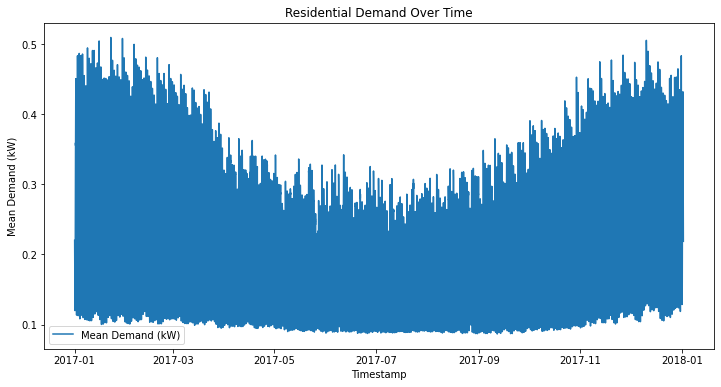

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load residential demand dataset
demand_data = pd.read_csv('Residential_demand.csv')
demand_data['Timestamp'] = pd.to_datetime(demand_data['Timestamp'])

# Plot Demand Over Time
plt.figure(figsize=(12, 6))
plt.plot(demand_data['Timestamp'], demand_data['Demand_mean_kw'], label='Mean Demand (kW)')
plt.title('Residential Demand Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Mean Demand (kW)')
plt.legend()
plt.show()

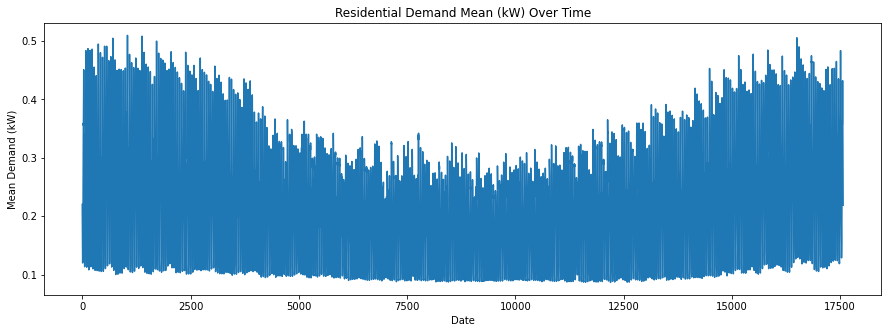

In [7]:


# Set the figure size within plt.figure()
plt.figure(figsize=(15, 5))
demand_data['Demand_mean_kw'].plot()
plt.title("Residential Demand Mean (kW) Over Time")
plt.xlabel("Date")
plt.ylabel("Mean Demand (kW)")
plt.show()


### 2: Exploring Demand Response Potential

Simulate the potential impact of demand response by increasing demand during high supply periods and reducing it during low supply periods.

### Code

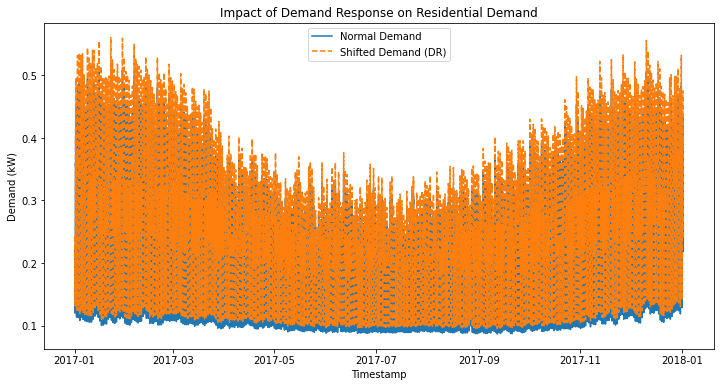

In [8]:
# Simulate a demand response shift (increase demand by 10% as a placeholder)
demand_data['Shifted_Demand'] = demand_data['Demand_mean_kw'] * 1.1  # Increase by 10%

# Plotting Shifted Demand
plt.figure(figsize=(12, 6))
plt.plot(demand_data['Timestamp'], demand_data['Demand_mean_kw'], label='Normal Demand')
plt.plot(demand_data['Timestamp'], demand_data['Shifted_Demand'], label='Shifted Demand (DR)', linestyle='--')
plt.title('Impact of Demand Response on Residential Demand')
plt.xlabel('Timestamp')
plt.ylabel('Demand (kW)')
plt.legend()
plt.show()

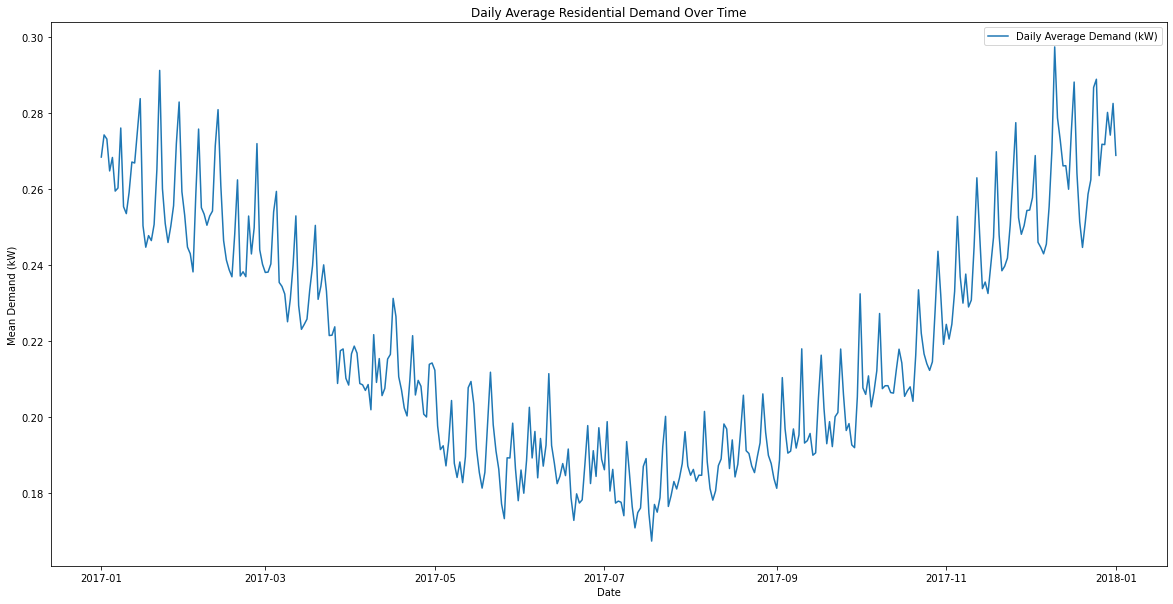

In [9]:
# Ensure the Timestamp column is set as the index
demand_data.set_index('Timestamp', inplace=True)

# Resample the data to daily averages to smooth the plot
daily_demand_plot = demand_data.resample('D').mean()

# Plot the daily demand pattern
plt.figure(figsize=(20, 10))
plt.plot(daily_demand_plot.index, daily_demand_plot['Demand_mean_kw'], label='Daily Average Demand (kW)')
plt.title("Daily Average Residential Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Mean Demand (kW)")
plt.legend()
plt.show()

In [10]:
dmd = pd.read_csv('residential_demand.csv', index_col=0, parse_dates=[0])
mask = (dmd.index.year == 2017)
dmd = dmd[mask]

In [11]:
N = 5000# use desk search to find households, this is an example from past years 
dmd_time_diffs = dmd.index.to_series().diff().dt.total_seconds() / 3600
dmd_time_diffs = dmd_time_diffs.fillna(0)
dmd_time_diffs.iloc[0] = 0.5 # Assume 0.5 hour for the first record

dmd1 = dmd.copy()
dmd1['TotalResidentialDemand_kwh'] = dmd1['Demand_mean_kw'] * N * dmd_time_diffs

# Aggregate hourly data
demand_hourly = dmd1[['TotalResidentialDemand_kwh']].resample('H').sum()

# Aggregate monthly data
demand_monthly = dmd1[['TotalResidentialDemand_kwh']].resample('M').sum() / 1000
demand_monthly.index = list(range(1,13))

print("The total residential demand in 2017 is " + str(round(dmd1['TotalResidentialDemand_kwh'].sum() / 10**6, 2)) + " GWh.")

The total residential demand in 2017 is 9.59 GWh.


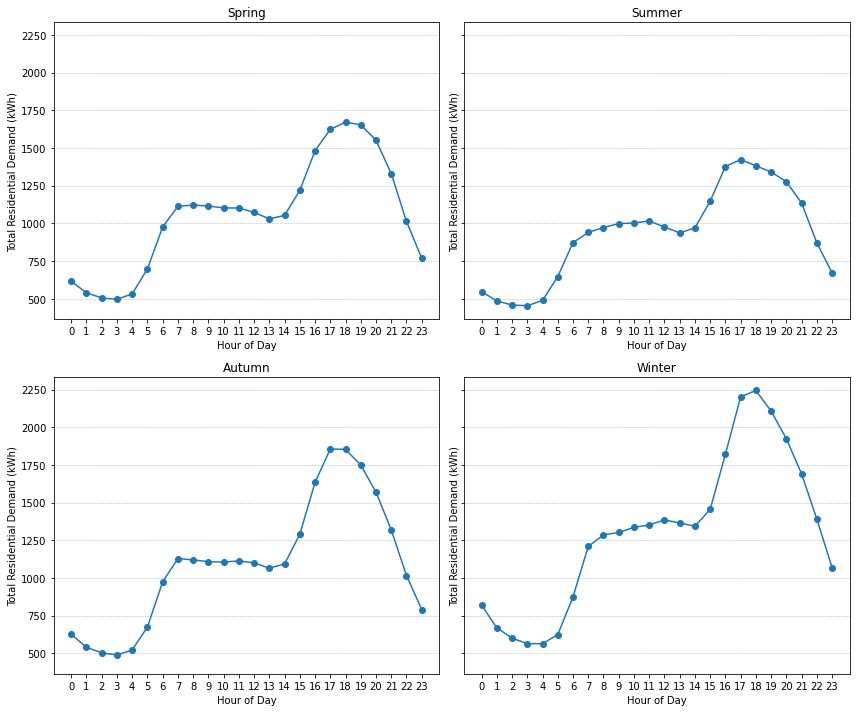

In [12]:
# Visualise hourly demand
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
           7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}

# Average hourly demand per season
demand_hourly['season'] = demand_hourly.index.month.map(seasons)
seasonal_demand_hourly = demand_hourly.groupby(['season', demand_hourly.index.hour]).mean()

# Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
season_names = ['Spring', 'Summer', 'Autumn', 'Winter']

# Plotting each season's data
for i, ax in enumerate(axes.flatten()):
    season = season_names[i]
    # Access the data for the given season
    data = seasonal_demand_hourly.xs(season, level=0)
    ax.plot(data.index, data.values, marker='o', linestyle='-')
    ax.set_title(season)
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Total Residential Demand (kWh)')
    ax.set_xticks(ticks=range(0, 24))
    ax.grid(axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

<Figure size 1440x360 with 0 Axes>

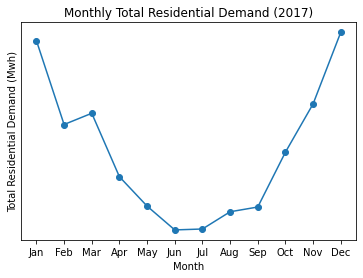

In [13]:
# Visualise monthly demand
plt.figure(figsize=(20, 5))
demand_monthly.plot(marker='o', linestyle='-', legend=False)
plt.title('Monthly Total Residential Demand (2017)')
plt.xlabel('Month')
plt.ylabel('Total Residential Demand (Mwh)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(ticks=range(1200, int(demand_monthly.max()) + 1, 200))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

### 3: Analyzing Economic and Sustainability Impact of Demand Response

Estimate potential cost savings and reduction in curtailment due to demand response implementation. Consider a basic calculation of the cost saved from reduced curtailment.

Consultants are expected to estimate the potential economic benefits of implementing a demand response (DR) scheme to reduce energy curtailment. By shifting energy demand to align with periods of excess renewable generation, DR can decrease the amount of energy that would otherwise be curtailed, resulting in direct cost savings. These savings stem from the value of renewable energy that can now be effectively utilized rather than wasted. Consultants should begin by assessing the current level of curtailment and the associated financial loss, then calculate potential savings based on different levels of DR penetration. This analysis will provide a tangible perspective on how much economic value DR can unlock for renewable generators and the local grid system.

Additionally, DR’s impact extends beyond immediate financial benefits to include sustainability gains. By utilizing more renewable energy that would have been curtailed, DR helps lower reliance on non-renewable power sources, thus reducing greenhouse gas emissions and supporting broader climate goals. Consultants should consider the environmental value of this reduced curtailment, quantifying emissions savings where possible. Together, these economic and sustainability benefits can create a compelling case for investing in DR technologies and foster long-term community engagement with renewable energy projects.